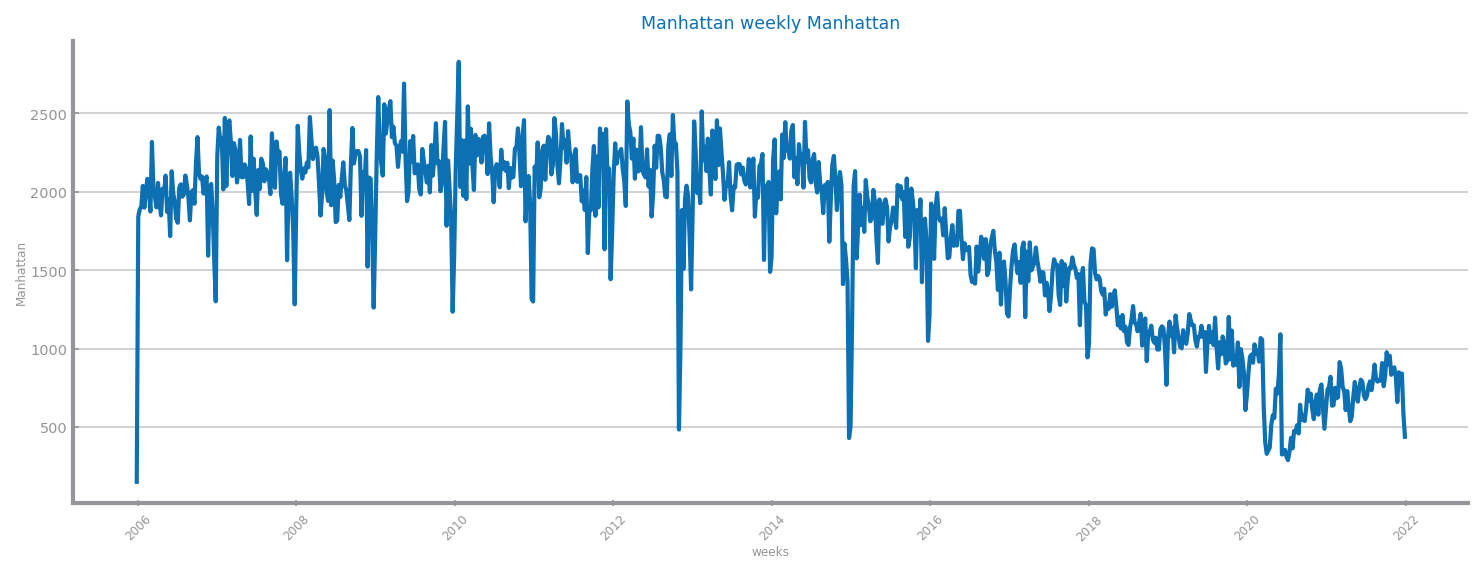

In [27]:


from numpy import sum
from pandas import DataFrame, Series, read_csv
from matplotlib.pyplot import figure, show, savefig
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

file_tag = "Manhattan"
filename = "/home/mina/Documents/portugal/dataScience/forecast_ny_arrests.csv"
index = "Date"
target = "Manhattan"
data: DataFrame = read_csv(
    filename,
    index_col=index,
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]
ss_weeks: Series = ts_aggregation_by(series, gran_level="W", agg_func=sum)

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_weeks.index.to_list(),
    ss_weeks.to_list(),
    xlabel="weeks",
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)
savefig(f'/home/mina/Documents/portugal/dataScience/Data_science_project/eval-5/image/{file_tag}_output1.png')




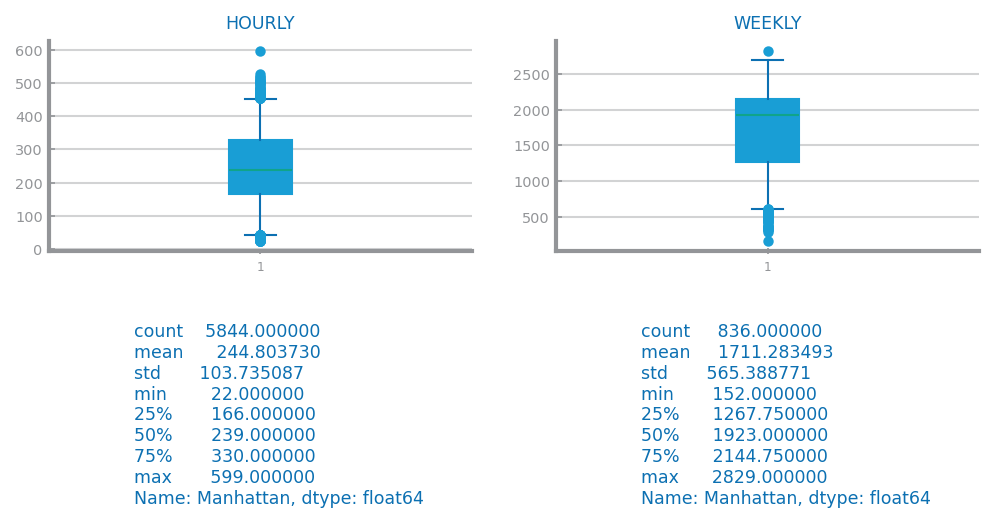

In [28]:
from numpy import array
from matplotlib.pyplot import show, subplots
from matplotlib.figure import Figure
from dslabs_functions import set_chart_labels

fig: Figure
axs: array
fig, axs = subplots(2, 2, figsize=(2 * HEIGHT, HEIGHT))
set_chart_labels(axs[0, 0], title="HOURLY")
axs[0, 0].boxplot(series)
set_chart_labels(axs[0, 1], title="WEEKLY")
axs[0, 1].boxplot(ss_weeks)

axs[1, 0].grid(False)
axs[1, 0].set_axis_off()
axs[1, 0].text(0.2, 0, str(series.describe()), fontsize="small")

axs[1, 1].grid(False)
axs[1, 1].set_axis_off()
axs[1, 1].text(0.2, 0, str(ss_weeks.describe()), fontsize="small")
savefig(f'/home/mina/Documents/portugal/dataScience/Data_science_project/eval-5/image/{file_tag}_botplox_distribution.png')


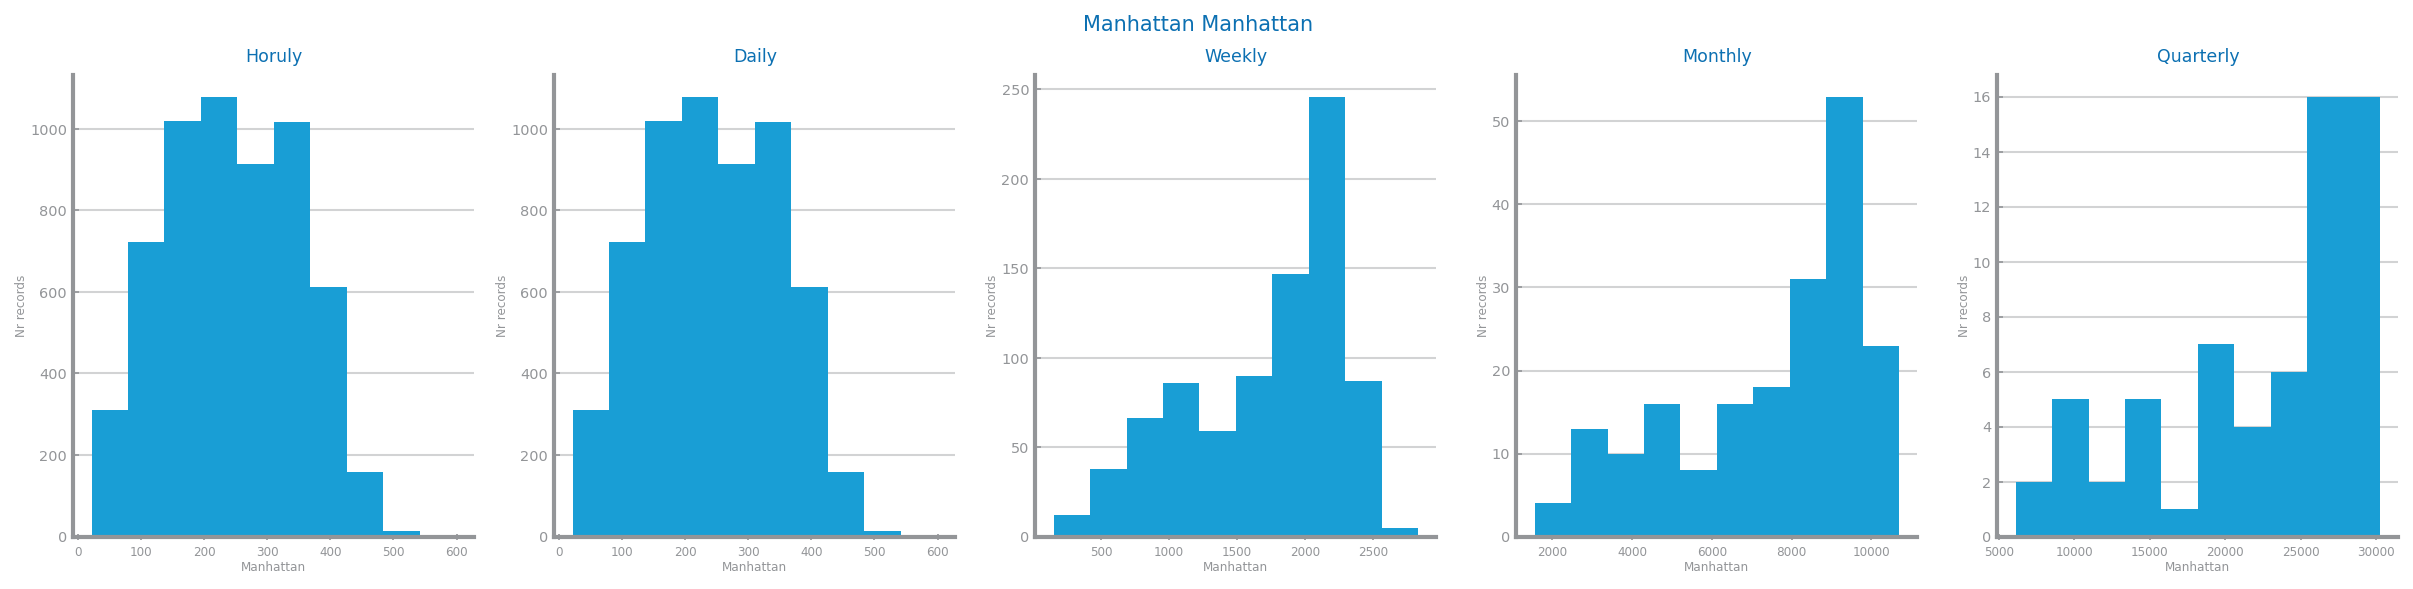

In [29]:
ss_days: Series = ts_aggregation_by(series, gran_level="D", agg_func=sum)
ss_months: Series = ts_aggregation_by(series, gran_level="M", agg_func=sum)
ss_quarters: Series = ts_aggregation_by(series, gran_level="Q", agg_func=sum)

grans: list[Series] = [series, ss_days, ss_weeks, ss_months, ss_quarters]
gran_names: list[str] = ["Horuly", "Daily", "Weekly", "Monthly", "Quarterly"]
fig: Figure
axs: array
fig, axs = subplots(1, len(grans), figsize=(len(grans) * HEIGHT, HEIGHT))
fig.suptitle(f"{file_tag} {target}")
for i in range(len(grans)):
    set_chart_labels(axs[i], title=f"{gran_names[i]}", xlabel=target, ylabel="Nr records")
    axs[i].hist(grans[i].values)
savefig(f'/home/mina/Documents/portugal/dataScience/Data_science_project/eval-5/image/{file_tag}_histogram_distribution.png')


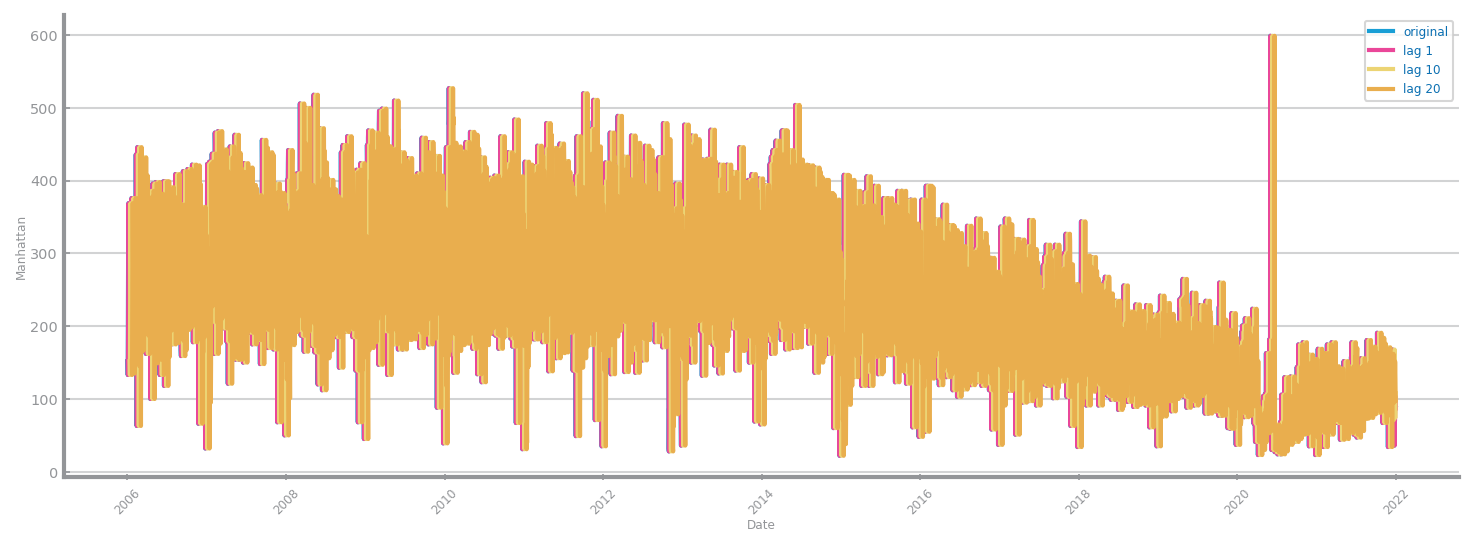

In [30]:
from dslabs_functions import plot_multiline_chart


def get_lagged_series(series: Series, max_lag: int, delta: int = 1):
    lagged_series: dict = {"original": series, "lag 1": series.shift(1)}
    for i in range(delta, max_lag + 1, delta):
        lagged_series[f"lag {i}"] = series.shift(i)
    return lagged_series


figure(figsize=(3 * HEIGHT, HEIGHT))
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, xlabel=index, ylabel=target)
savefig(f'/home/mina/Documents/portugal/dataScience/Data_science_project/eval-5/image/{file_tag}_lag_plot_autocorelation.png')


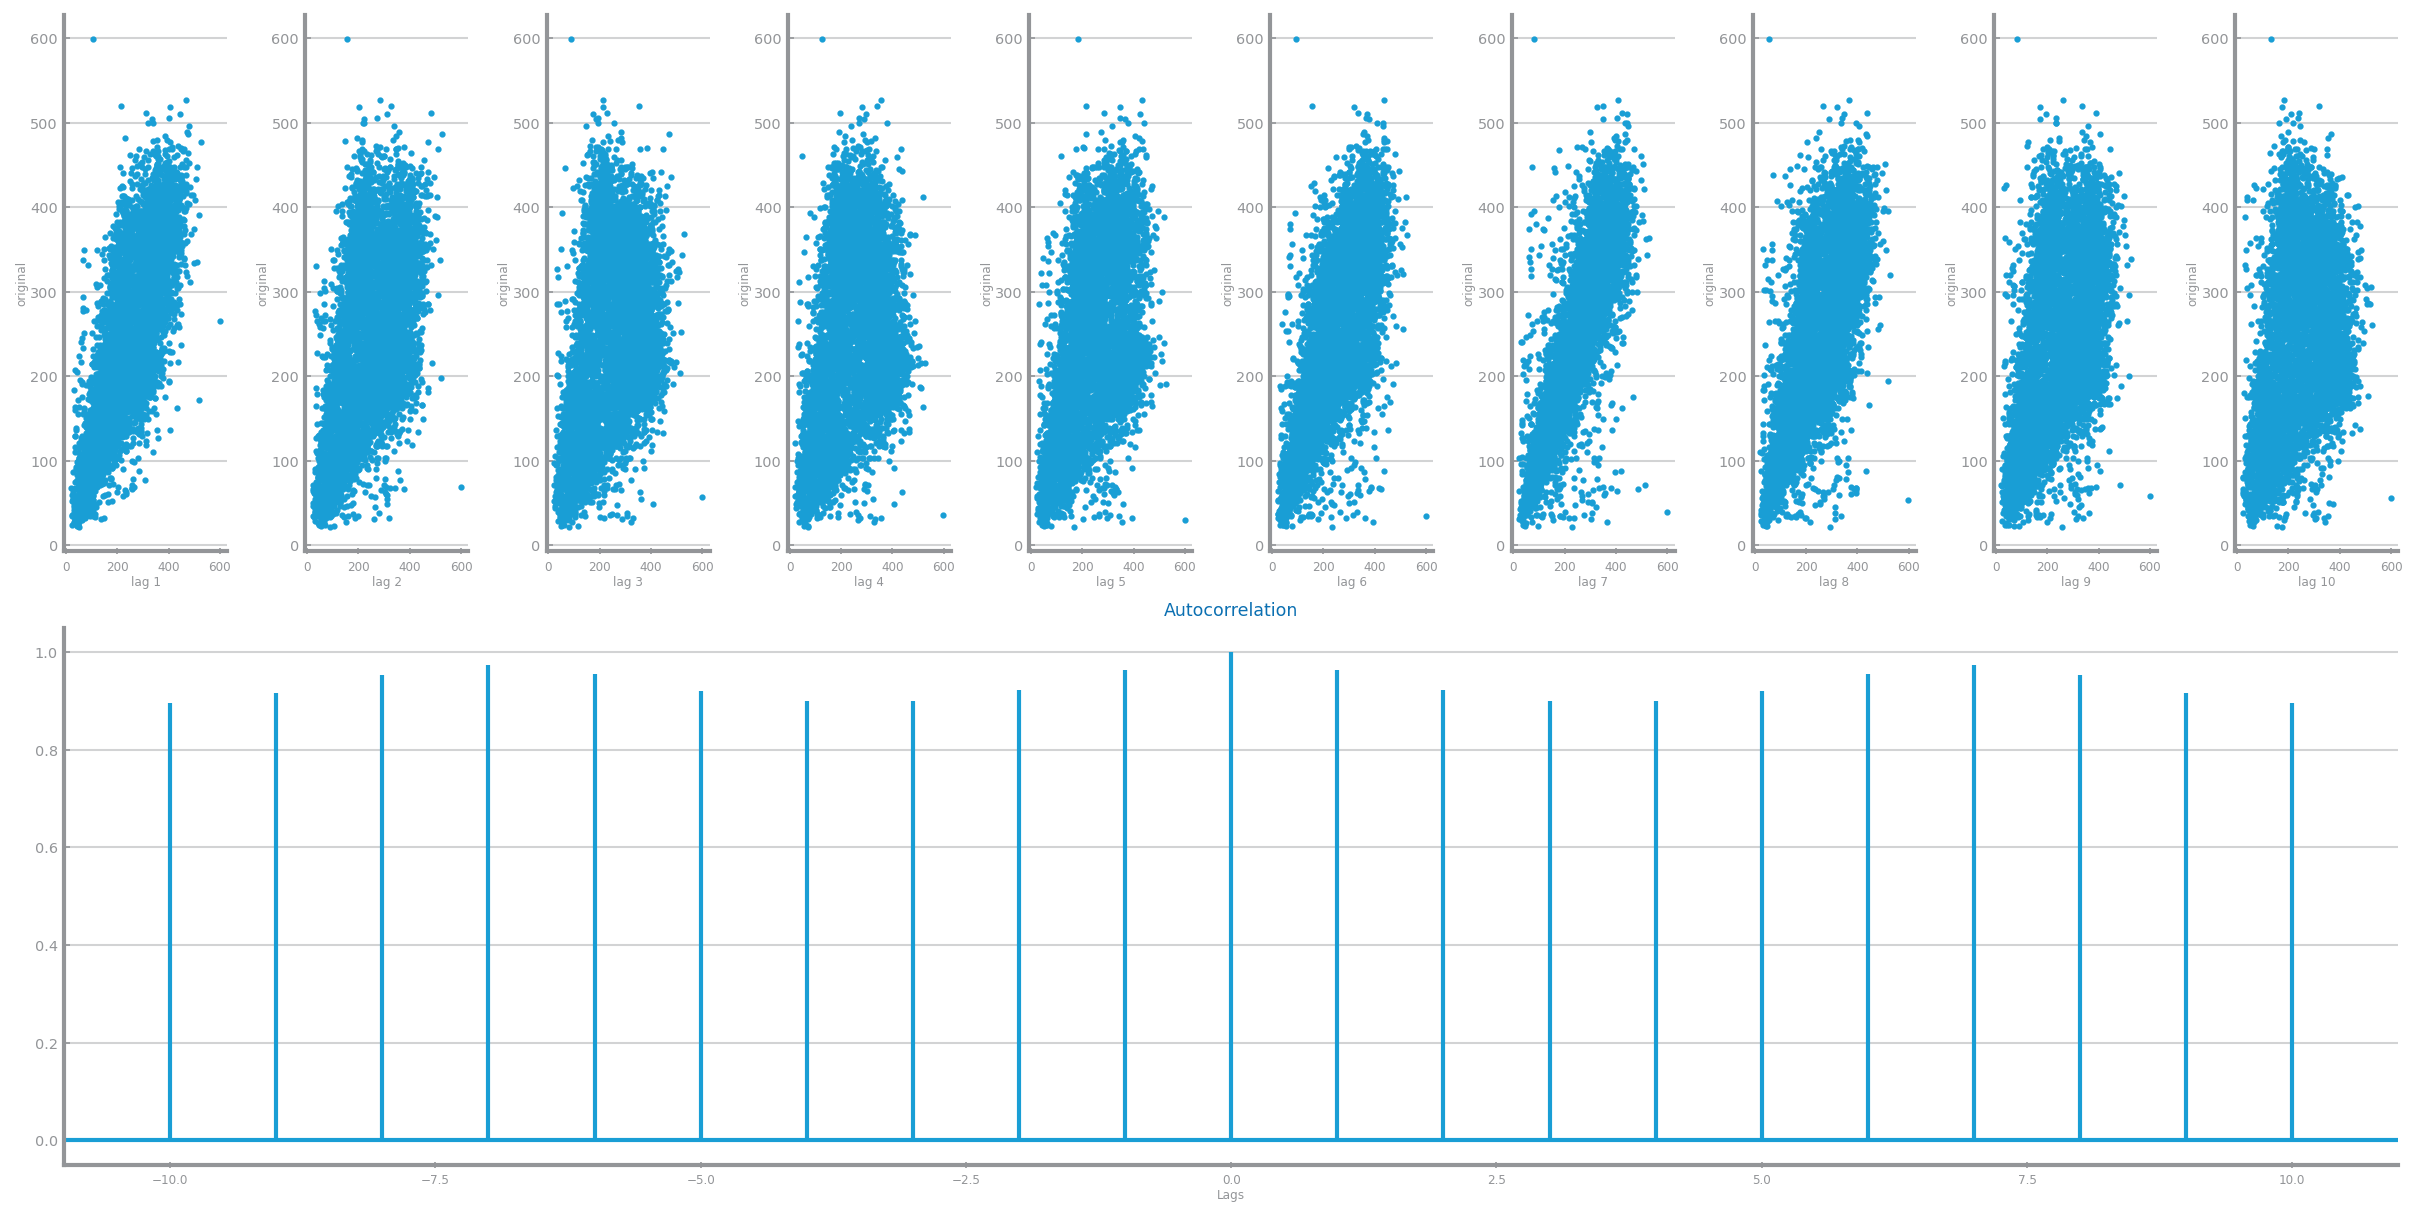

In [31]:
from matplotlib.pyplot import setp
from matplotlib.gridspec import GridSpec


def autocorrelation_study(series: Series, max_lag: int, delta: int = 1):
    k: int = int(max_lag / delta)
    fig = figure(figsize=(4 * HEIGHT, 2 * HEIGHT), constrained_layout=True)
    gs = GridSpec(2, k, figure=fig)

    series_values: list = series.tolist()
    for i in range(1, k + 1):
        ax = fig.add_subplot(gs[0, i - 1])
        lag = i * delta
        ax.scatter(series.shift(lag).tolist(), series_values)
        ax.set_xlabel(f"lag {lag}")
        ax.set_ylabel("original")
    ax = fig.add_subplot(gs[1, :])
    ax.acorr(series, maxlags=max_lag)
    ax.set_title("Autocorrelation")
    ax.set_xlabel("Lags")
    return


autocorrelation_study(series, 10, 1)
savefig(f'/home/mina/Documents/portugal/dataScience/Data_science_project/eval-5/image/{file_tag}_correlogram_autocorelation.png')
